<a href="https://colab.research.google.com/github/Murcha1990/ML_AI25/blob/main/Hometasks/Base/HW1_Regression_with_inference_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (base). Часть 1**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;

**Максимальная оценка за дз**
> Оценка за первую часть домашки = $min(\text{ваш балл}, 7)$


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.**

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

Давайте зафиксируем важный момент.

**Задание 0 (0 баллов).**
Изучите и ответье на вопрос: для чего фиксируем сиды в домашках?

> Сиды фиксируются для воспроизводимости результатов.
>
> Без фиксации генераторы случайных чисел каждый раз будут давать разные значения, что приведет к тому, что результаты не будут совпадать при повторных запусках процессов, и их невозможно будет корректно проверить.

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [176]:
import pandas as pd

In [177]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.5 балла)**

Вы уже встречались с pandas в первой половине семестра. Теперь будем постоянно (кроме некоторых случаев) использовать его для анализа данных и наслаивать навыки. Выполните операции, направленные на практику основных действий с `pandas`:

**0.1 балла**
- [ ] Отобразите 30 случайных строк тренировочного датасета.
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения
- [ ] Посмотрите, есть ли в данных явные дубликаты


**0.2 балла**
Ответьте на вопросы:
- [ ] Выводы о чем можно сделать, используя случайные/верхние/нижние строки? А о чем нельзя?
- [ ] Достаточно ли метода duplicated для анализа дубликатов? Почему?

**0.15 балла**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)

In [178]:
print("30 случайных строк тренировочного датасета:")
display(df_train.sample(30, random_state=42))

30 случайных строк тренировочного датасета:


name  year  selling_price  km_driven  \
6565        Renault KWID Climber 1.0 MT BSIV  2019         300000      35000   
2943                      Maruti Wagon R LXI  2013         225000      58343   
2024                    Hyundai i20 Asta 1.2  2013         360000      30000   
263                     Hyundai i20 1.2 Asta  2010         300000      70000   
4586        Skoda Octavia L and K 1.9 TDI MT  2005         250000     120000   
4479                         Maruti Ciaz ZXi  2016         700000      20000   
4881  Hyundai Grand i10 1.2 Kappa Magna BSIV  2017         445000      27000   
3583          Ford Ecosport 1.5 DV5 MT Trend  2016         515000      68609   
6361                  Hyundai Verna 1.4 VTVT  2014         500000      33400   
4108                     Hyundai i20 Era 1.2  2015         490000      45900   
132          Mercedes-Benz S-Class S 350 CDI  2017        5850000      47000   
6974  Fiat Grande Punto 1.3 Dynamic (Diesel)  2012         450000      70000   
3383                       Maruti Ertiga VDI  2012         550000      67000   
5947                     Mahindra Bolero GLX  2006         200000     120000   
4970                Ford Fiesta 1.4 SXi TDCi  2009         180000     163000   
4260                    Maruti SX4 Zxi BSIII  2010         300000      50000   
5861                    Ford Figo Petrol LXI  2012         290000      25000   
2264                   Tata Safari Storme EX  2015         503000     110000   
1941                        Maruti Swift VXI  2018         550000      24400   
763    Ford Fiesta Classic 1.4 Duratorq CLXI  2012         300000      64000   
5384                Maruti Alto 800 LXI BSIV  2016         275000      38000   
3044              BMW X4 M Sport X xDrive20d  2019        5400000       7500   
6575    Ford EcoSport 1.5 TDCi Titanium BSIV  2017         934000     101000   
101                     Hyundai Verna 1.6 SX  2013         522000     150000   
3626                 Maruti Baleno Alpha 1.3  2018         740000      38817   
1371                        Mahindra Xylo D2  2011         450000      56000   
625                    Honda CR-V 2.4 4WD AT  2007         325000      70000   
3915            Mahindra TUV 300 mHAWK100 T8  2017         725000     100000   
1075                 Maruti Wagon R VXi BSII  2012         225000      80000   
6739               Tata Manza Aura Quadrajet  2010         110000      88000   

        fuel       seller_type transmission         owner     mileage  \
6565  Petrol        Individual       Manual   First Owner  23.01 kmpl   
2943  Petrol  Trustmark Dealer       Manual   First Owner  21.79 kmpl   
2024  Petrol        Individual       Manual   First Owner   18.5 kmpl   
263   Petrol        Individual       Manual   First Owner   17.0 kmpl   
4586  Diesel        Individual       Manual   Third Owner   16.4 kmpl   
4479  Petrol        Individual       Manual   First Owner  20.73 kmpl   
4881  Petrol        Individual       Manual   First Owner   18.9 kmpl   
3583  Diesel            Dealer       Manual   First Owner   22.7 kmpl   
6361  Petrol        Individual       Manual   First Owner  17.43 kmpl   
4108  Petrol        Individual       Manual  Second Owner   18.6 kmpl   
132   Diesel            Dealer    Automatic   First Owner   13.5 kmpl   
6974  Diesel        Individual       Manual   First Owner   20.3 kmpl   
3383  Diesel        Individual       Manual   First Owner  20.77 kmpl   
5947  Diesel        Individual       Manual  Second Owner         NaN   
4970  Diesel            Dealer       Manual   First Owner         NaN   
4260  Petrol        Individual       Manual   First Owner   15.0 kmpl   
5861  Petrol        Individual       Manual   First Owner   15.6 kmpl   
2264  Diesel        Individual       Manual   First Owner   14.1 kmpl   
1941  Petrol        Individual       Manual   First Owner   22.0 kmpl   
763   Diesel        Individual       Manual  Second Owner   17.8 kmpl   
5384  Petrol            De

In [179]:
print("\nПервые 5 объектов тестового датасета:")
display(df_test.head())


Первые 5 объектов тестового датасета:


name  year  selling_price  km_driven  \
0                  Mahindra Xylo E4 BS IV  2010         229999     168000   
1              Tata Nexon 1.5 Revotorq XE  2017         665000      25000   
2                    Honda Civic 1.8 S AT  2007         175000     218463   
3                    Honda City i DTEC VX  2015         635000     173000   
4  Tata Indica Vista Aura 1.2 Safire BSIV  2011         130000      70000   

     fuel seller_type transmission         owner    mileage   engine  \
0  Diesel  Individual       Manual   First Owner  14.0 kmpl  2498 CC   
1  Diesel  Individual       Manual   First Owner  21.5 kmpl  1497 CC   
2  Petrol  Individual    Automatic   First Owner  12.9 kmpl  1799 CC   
3  Diesel  Individual       Manual   First Owner  25.1 kmpl  1498 CC   
4  Petrol  Individual       Manual  Second Owner  16.5 kmpl  1172 CC   

   max_power                   torque  seats  
0    112 bhp  260 Nm at 1800-2200 rpm    7.0  
1  108.5 bhp      260Nm@ 1500-2750rpm    5.0  
2    130 bhp           172Nm@ 4300rpm    5.0  
3   98.6 bhp           200Nm@ 1750rpm    5.0  
4     65 bhp     96  Nm at 3000  rpm     5.0

In [180]:
print("\nПропуски в датасете:")
print(df_train.isna().sum())


Пропуски в датасете:
name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64


In [181]:
print("\nКолонки с пропусками:")
cols_with_nan = df_train.columns[df_train.isna().sum() > 0].tolist()
print(cols_with_nan)


Колонки с пропусками:
['mileage', 'engine', 'max_power', 'torque', 'seats']


In [182]:
print(f"\nКоличество полных дубликатов: {df_train.duplicated().sum()}")


Количество полных дубликатов: 985


In [183]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df_train, title="Profile report", explorative=True)
profile

Render HTML: 100%|██████████| 1/1 [00:00<00:00, 11.40it/s]


> **Ответы на вопросы:**
>
> 1. *Какие выводы можно сделать по случайным/верхним/нижним строкам?*
>    - **Можно:** понять структуру данных, типы признаков, диапазоны значений, примеры данных
>    - **Нельзя:** делать статистические выводы о распределениях, корреляциях, зависимостях с целевой переменной
>
> 2. *Достаточно ли метода duplicated для анализа дубликатов?*
>    - **Нет.** Метод ищет только полные дубликаты по всем колонкам. В реальных данных часто бывают частичные дубликаты — например, одинаковые признаки, но разная целевая переменная например из-за ошибок ввода.

Мы обнаружили пропуски. Давайте избавимся от них.

**(0.05 балла)**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [184]:
df_train["mileage"] = df_train["mileage"].str.replace(" kmpl", "").str.replace(" km/kg", "").astype(float)
df_test["mileage"] = df_test["mileage"].str.replace(" kmpl", "").str.replace(" km/kg", "").astype(float)
df_train["engine"] = df_train["engine"].str.replace(" CC", "").astype(float)
df_test["engine"] = df_test["engine"].str.replace(" CC", "").astype(float)

# Обработка max_power - убираем " bhp"
df_train["max_power"] = df_train["max_power"].str.replace(" bhp", "")
df_test["max_power"] = df_test["max_power"].str.replace(" bhp", "")
df_train["max_power"] = pd.to_numeric(df_train["max_power"], errors="coerce")
df_test["max_power"] = pd.to_numeric(df_test["max_power"], errors="coerce")

# Обработка torque - извлекаем первое число
df_train["torque"] = df_train["torque"].str.extract(r"(\d+\.?\d*)").astype(float)
df_test["torque"] = df_test["torque"].str.extract(r"(\d+\.?\d*)").astype(float)

print("Пропуски после обработки строковых признаков:")
print(df_train.isna().sum())
median_values = df_train.median(numeric_only=True)
print("\nМедианные значения (train):")
print(median_values)

df_train = df_train.fillna(median_values)
df_test = df_test.fillna(median_values)
print("\nПропуски после заполнения:")
print(f"Train: {df_train.isna().sum().sum()}, Test: {df_test.isna().sum().sum()}")

Пропуски после обработки строковых признаков:
name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        197
torque           203
seats            202
dtype: int64

Медианные значения (train):
year               2015.0
selling_price    450000.0
km_driven         60000.0
mileage              19.3
engine             1248.0
max_power            82.0
torque              160.0
seats                 5.0
dtype: float64

Пропуски после заполнения:
Train: 0, Test: 0


### **Задание 2 (0.5 балла)**

На прошлом шаге вы рассмотрели дубликаты. Однако дубликат может быть связан с не только полным повторением информации в нескольких строках, но и частиным. Например, объект мог был внесен в базу данных с разным значением целевой переменной. В этом шаге займемся такими дублями!

**Ваши действия:**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [185]:
feature_cols = df_train.columns.drop("selling_price")
partial_duplicates = df_train.duplicated(subset=feature_cols, keep=False)
print(f"Количество частичных дубликатов: {partial_duplicates.sum()}")


df_train = df_train.drop_duplicates(subset=feature_cols, keep="first")
df_train = df_train.reset_index(drop=True)
print(f"\nРазмер датасета после удаления дубликатов: {df_train.shape}")

Количество частичных дубликатов: 1799

Размер датасета после удаления дубликатов: (5840, 13)


In [186]:
assert df_train.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [187]:
# Удаляем столбец torque (он сложен для обработки и не требуется в задании)
df_train = df_train.drop(columns=["torque"])
df_test = df_test.drop(columns=["torque"])

print("Столбец torque удален")

Столбец torque удален


### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [188]:
df_train["engine"] = df_train["engine"].astype(int)
df_test["engine"] = df_test["engine"].astype(int)
df_train["seats"] = df_train["seats"].astype(int)
df_test["seats"] = df_test["seats"].astype(int)

print(df_train.dtypes)

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine             int64
max_power        float64
seats              int64
dtype: object


### **Задание 5 (0.15 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сделайте вывод.

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [189]:
num_cols = df_train.select_dtypes(include=["int64", "float64"]).columns

print("Основные статистики по числовым столбцам (train):")
display(df_train[num_cols].describe())

print("\nОсновные статистики по числовым столбцам (test):")
display(df_test[num_cols].describe())


Основные статистики по числовым столбцам (train):


year  selling_price     km_driven      mileage       engine  \
count  5840.000000   5.840000e+03  5.840000e+03  5840.000000  5840.000000   
mean   2013.428425   5.229601e+05  7.395224e+04    19.428611  1429.448973   
std       4.095622   5.354320e+05  6.007114e+04     3.986026   485.662834   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2011.000000   2.500000e+05  3.900000e+04    16.950000  1197.000000   
50%    2014.000000   4.050000e+05  7.000000e+04    19.300000  1248.000000   
75%    2017.000000   6.400000e+05  1.000000e+05    22.300000  1498.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

         max_power        seats  
count  5840.000000  5840.000000  
mean     87.910782     5.426712  
std      31.639585     0.982344  
min       0.000000     2.000000  
25%      68.000000     5.000000  
50%      81.860000     5.000000  
75%      99.000000     5.000000  
max     400.000000    14.000000


Основные статистики по числовым столбцам (test):


year  selling_price      km_driven      mileage      engine  \
count  1000.000000   1.000000e+03    1000.000000  1000.000000  1000.00000   
mean   2013.681000   6.179010e+05   71393.341000    19.337480  1454.87600   
std       4.012149   7.585539e+05   48486.218662     3.951751   521.99574   
min    1995.000000   3.100000e+04    1303.000000     0.000000   624.00000   
25%    2011.000000   2.500000e+05   37000.000000    16.550000  1197.00000   
50%    2014.000000   4.349990e+05   61500.000000    19.300000  1248.00000   
75%    2017.000000   6.700000e+05  100000.000000    22.300000  1582.00000   
max    2020.000000   6.000000e+06  375000.000000    32.260000  3604.00000   

         max_power        seats  
count  1000.000000  1000.000000  
mean     90.844330     5.403000  
std      34.892709     0.912921  
min      34.200000     4.000000  
25%      69.000000     5.000000  
50%      82.425000     5.000000  
75%     102.000000     5.000000  
max     280.000000     9.000000

In [190]:
cat_cols = df_train.select_dtypes(include=["object"]).columns

print("Основные статистики по категориальным столбцам (train):")
display(df_train[cat_cols].describe())

print("\nОсновные статистики по категориальным столбцам (test):")
display(df_test[cat_cols].describe())

Основные статистики по категориальным столбцам (train):


name    fuel seller_type transmission        owner
count                     5840    5840        5840         5840         5840
unique                    1924       4           3            2            5
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner
freq                        91    3177        5223         5336         3603


Основные статистики по категориальным столбцам (test):


name    fuel seller_type transmission        owner
count                  1000    1000        1000         1000         1000
unique                  621       4           3            2            5
top     Maruti Alto 800 LXI  Diesel  Individual       Manual  First Owner
freq                     15     534         837          877          623

> **Выводы:**
>
> - Присутствуют аномально большие значения (возможные выбросы) - selling_price до 10 млн; км_driven до 2.3 млн
> - Train и test имеют схожие статистики по числовым признакам - в теории это говорит о корректном разделении выборок
> - В обеих выборках доминируют дизельные автомобили с ручной коробкой передач от первого владельца

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

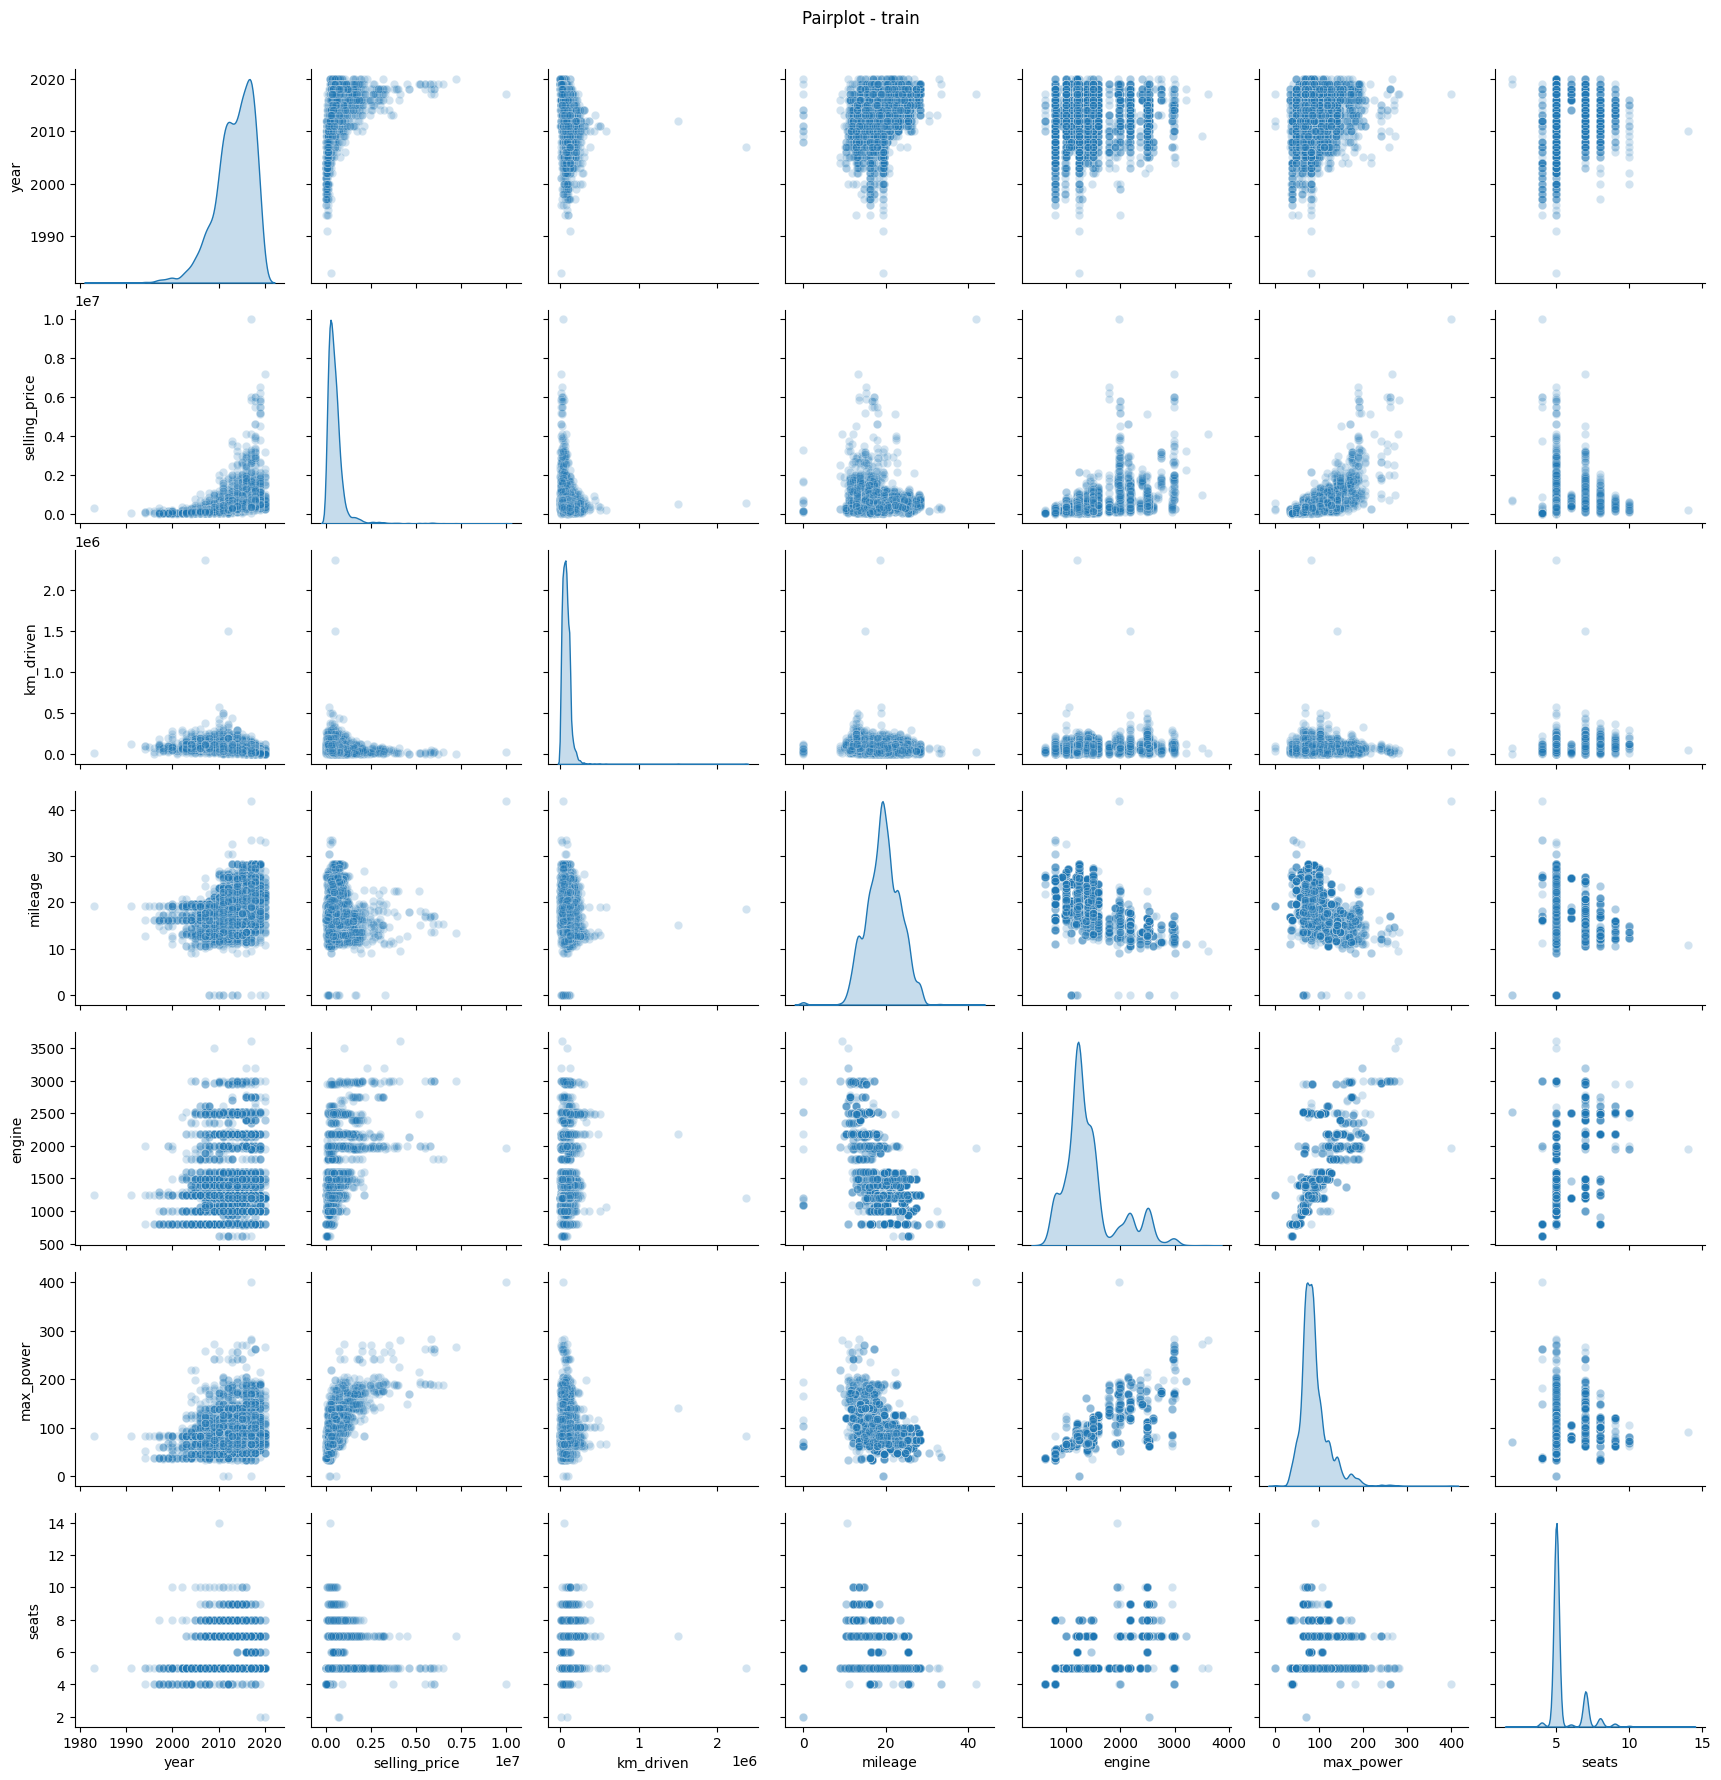

In [191]:
sns.pairplot(df_train[num_cols], diag_kind="kde", plot_kws={"alpha": 0.2})
plt.suptitle("Pairplot - train", y=1.02)
plt.show()

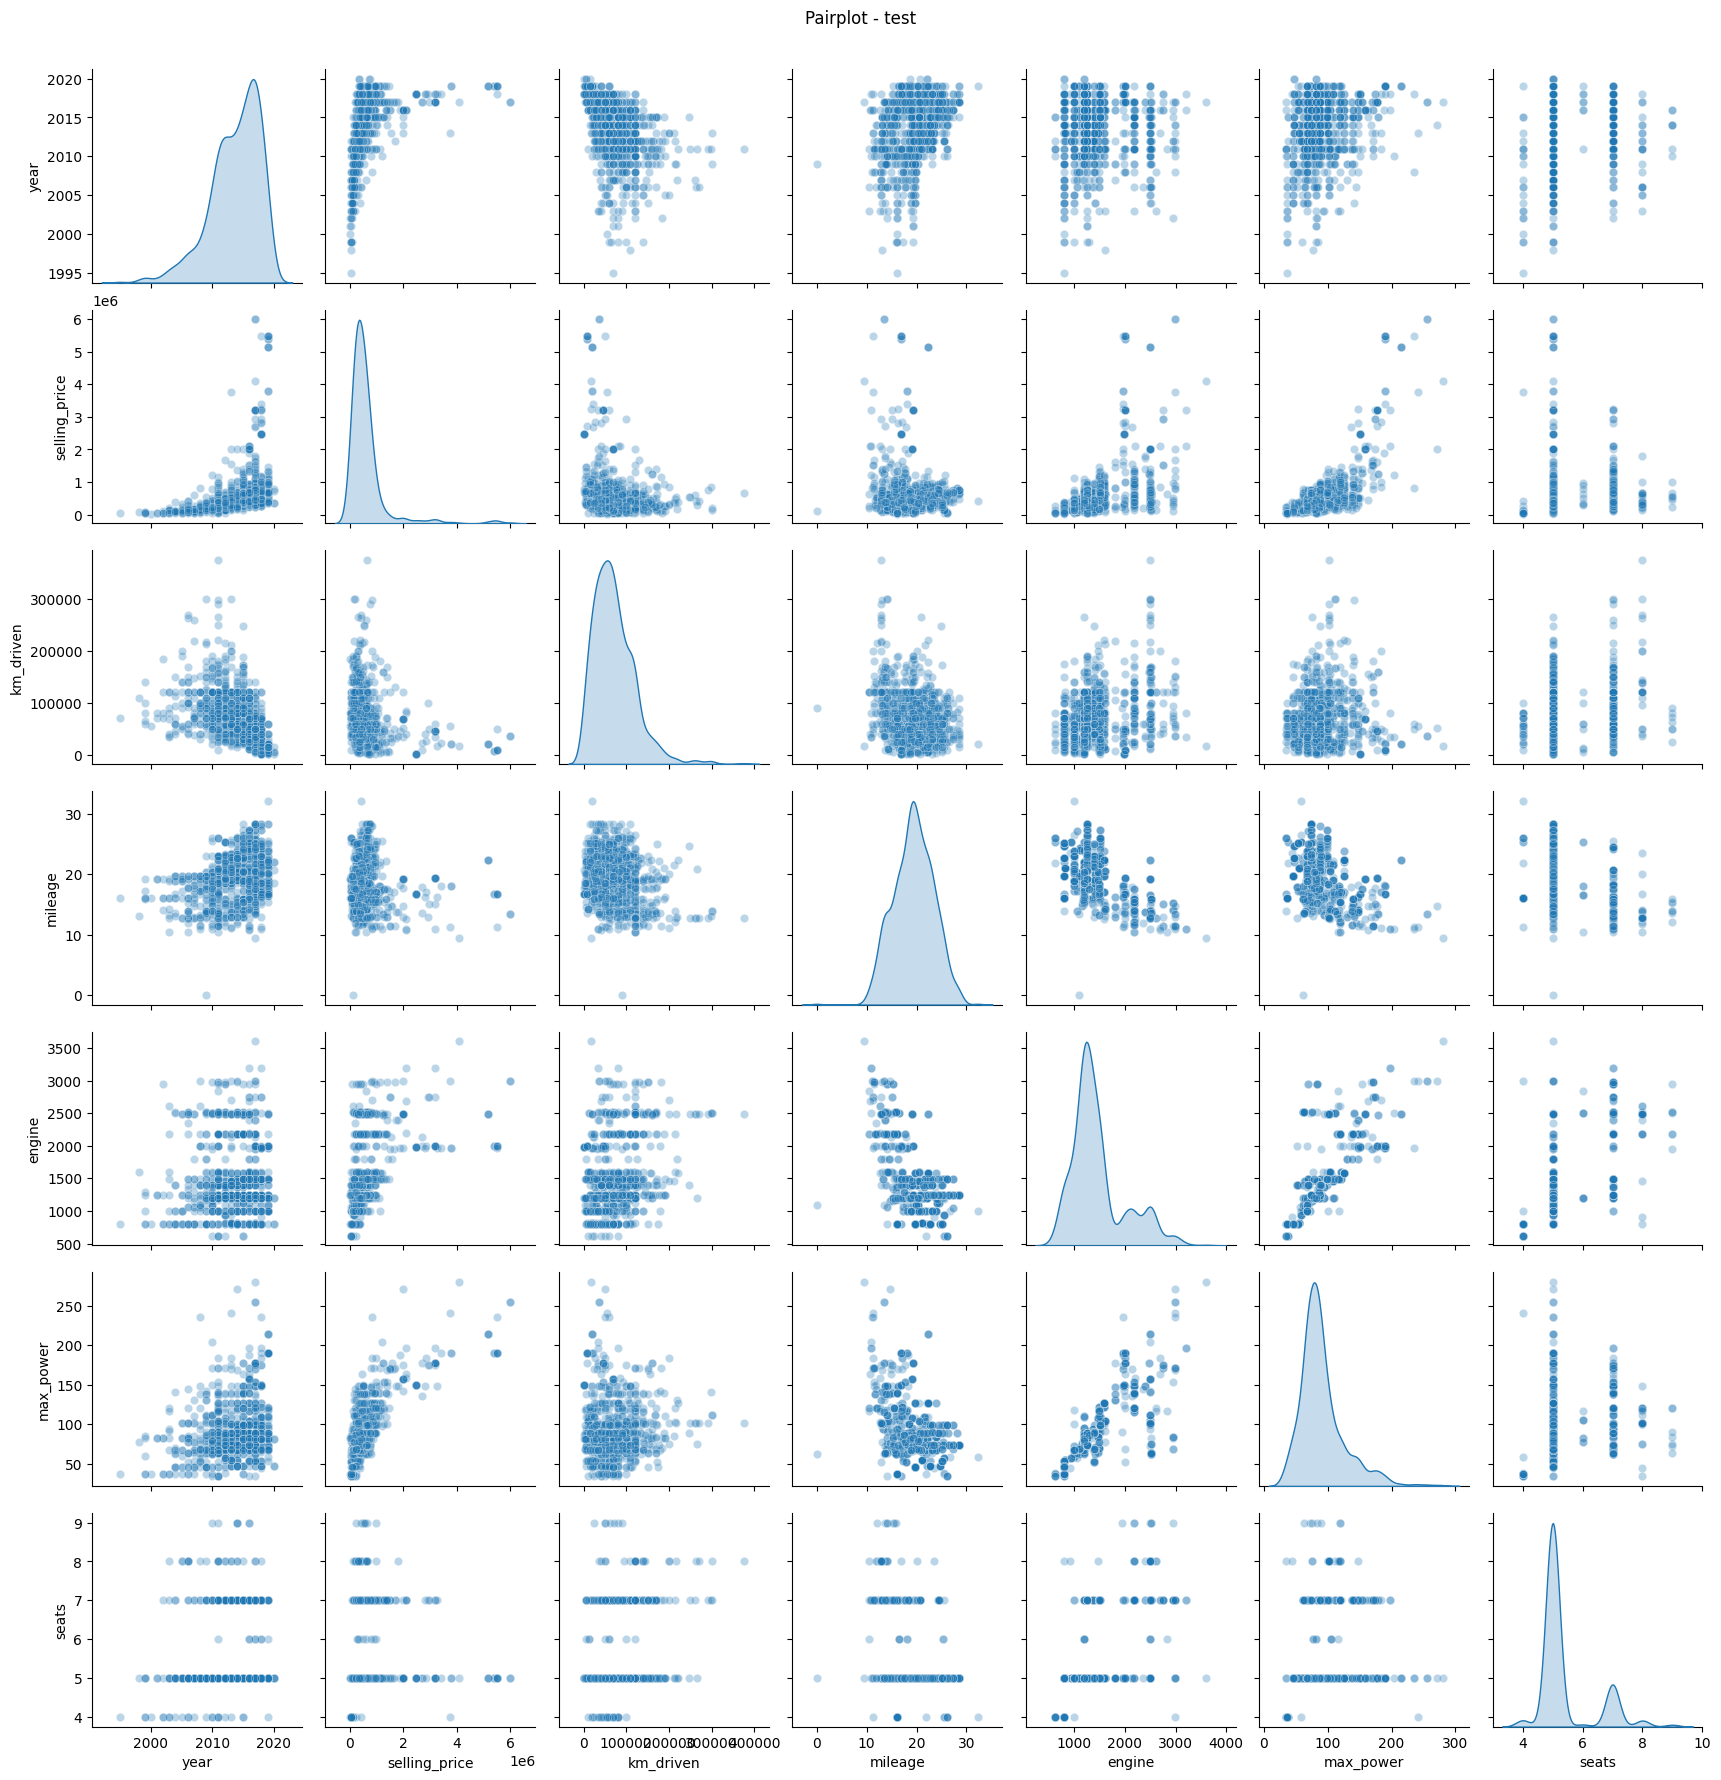

In [192]:
sns.pairplot(df_test[num_cols], diag_kind="kde", plot_kws={"alpha": 0.3})
plt.suptitle("Pairplot - test", y=1.02)
plt.show()

> **Ответы на вопросы:**
>
> 1. *Можно ли предположить связь признаков с целевой переменной?*
>    - **Да:**
>      - **year**: новые автомобили стоят дороже
>      - **km_driven**: обратная зависимость - больший пробег = ниже цена
>      - **engine**: больший объем двигателя = выше цена
>      - **max_power**: прямая зависимость с ценой
>
> 2. *Можно ли предположить корреляции между признаками?*
>    - **Да:**
>      - **engine с max_power**: чем больше двигатель, тем выше мощность
>      - **year с km_driven**: новые машины имеют меньший пробег
>
> 3. *Похожими ли оказались совокупности при разделении на трейн и тест?*
>    - **Да**, распределения очень похожи, корреляции сохранились. Данные разделены корректно.

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


year  selling_price  km_driven   mileage    engine  \
year           1.000000       0.427279  -0.368966  0.342172  0.002819   
selling_price  0.427279       1.000000  -0.164828 -0.104458  0.447672   
km_driven     -0.368966      -0.164828   1.000000 -0.182245  0.229766   
mileage        0.342172      -0.104458  -0.182245  1.000000 -0.572677   
engine         0.002819       0.447672   0.229766 -0.572677  1.000000   
max_power      0.156648       0.692754   0.024630 -0.373271  0.681082   
seats          0.041178       0.149953   0.192328 -0.450810  0.652172   

               max_power     seats  
year            0.156648  0.041178  
selling_price   0.692754  0.149953  
km_driven       0.024630  0.192328  
mileage        -0.373271 -0.450810  
engine          0.681082  0.652172  
max_power       1.000000  0.244060  
seats           0.244060  1.000000

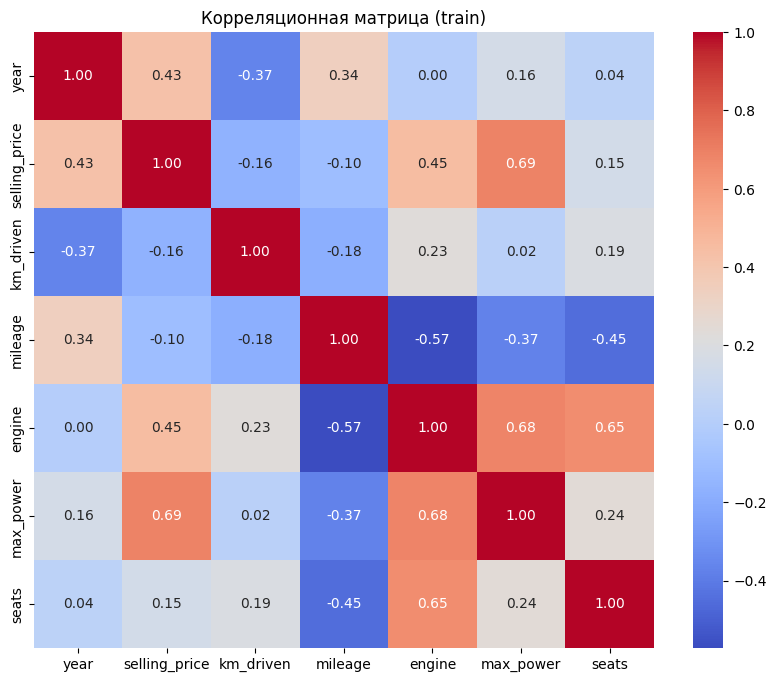

In [193]:
corr_matrix = df_train.corr(numeric_only=True)
display(corr_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Корреляционная матрица (train)")
plt.show()

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

> **Ответы:**
>
> 1. *Какие 2 признака наименее скоррелированы между собой?*
>    - **engine - year**
>
> 2. *Между какими наблюдается довольно сильная положительная линейная зависимость?*
>    - **engine с max_power**: чем больше объем двигателя, тем выше мощность
>    - **max_power с selling_price**: чем выше мощность, тем выше цена
>    - **engine с seats**: больший двигатель часто у автомобилей с большим количеством мест
>
> 3. *Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем больше километров проехала машина?*
>    - **Да**, между year и km_driven есть отрицательная корреляция.

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

- Каждая дополнительная визуализация может принести до 0.25 баллов при условии, что она обоснована.

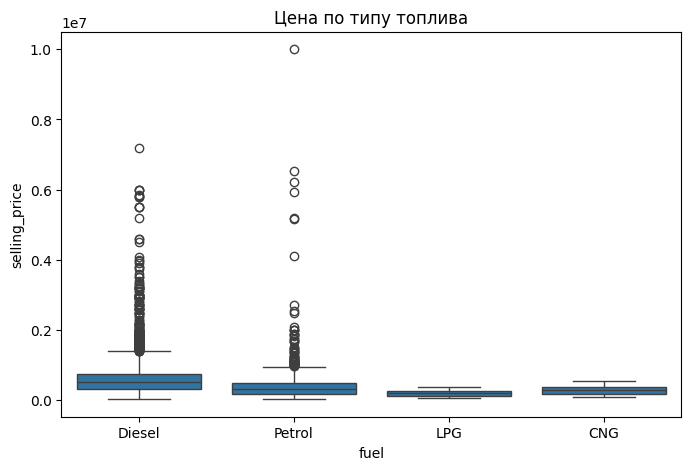

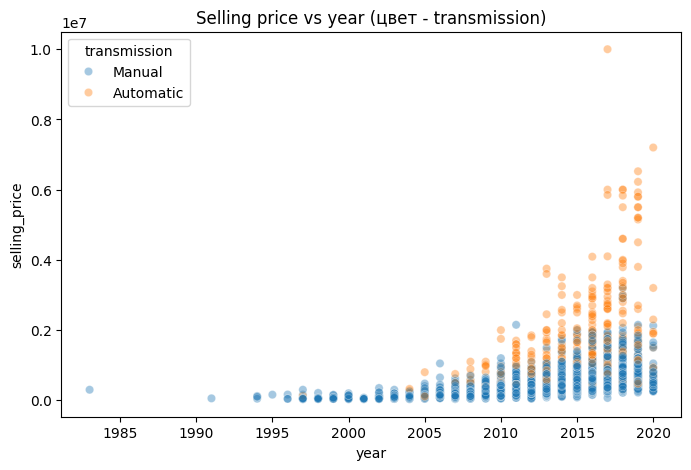

In [194]:
# Бонусная визуализация 1: Цена по типу топлива
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_train, x="fuel", y="selling_price")
plt.title("Цена по типу топлива")
plt.show()

# Бонусная визуализация 2: Цена vs год с разбивкой по трансмиссии
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_train, x="year", y="selling_price", hue="transmission", alpha=0.4)
plt.title("Selling price vs year (цвет - transmission)")
plt.show()

> **Обоснование:**
>
> **1. Цена по типу топлива**
> - Дизельные автомобили (Diesel) в среднем дороже бензиновых (Petrol). Медианная цена дизельных авто заметно выше. Тип топлива является информативным признаком.
>
> **2. Цена vs Год с разбивкой по трансмиссии**
> - **Зачем:** Трансмиссия (Manual/Automatic) — важный категориальный признак, влияющий на цену. Визуализация показывает, как цена меняется с годом выпуска для разных типов КПП. Автомобили с автоматической коробкой передач (Automatic) стоят значительно дороже ручных (Manual) во всех годах. Разница особенно заметна для новых автомобилей.

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Сделайте тренировочный и тестовый наборы. Сделайте на тренировочный и тестовый наборы. Она уже даны, достаточно просто отделить целевой признак Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных. Используйте уже имеющиеся данные train и test при разбиении. Если считаете уместным применить какую-то более хитрую технику разбиения — примените, но опишите, зачем.

In [195]:
train_numeric = df_train.copy()
test_numeric = df_test.copy()

cat_cols_to_drop = df_train.select_dtypes(include=["object"]).columns
train_numeric = train_numeric.drop(columns=cat_cols_to_drop)
test_numeric = test_numeric.drop(columns=cat_cols_to_drop)

y_train = train_numeric["selling_price"]
X_train = train_numeric.drop(columns=["selling_price"])
y_test = test_numeric["selling_price"]
X_test = test_numeric.drop(columns=["selling_price"])

In [196]:
print("Выбранные числовые признаки:\n", *sorted(X_train.columns.tolist()))

Выбранные числовые признаки:
 engine km_driven max_power mileage seats year


### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [197]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
mse_train = MSE(y_train, y_train_pred)
mse_test = MSE(y_test, y_test_pred)

print(f"Linear Regression:")
print(f"R2 train = {r2_train:.4f}, R2 test = {r2_test:.4f}")
print(f"MSE train = {mse_train:.2f}, MSE test = {mse_test:.2f}")

Linear Regression:
R2 train = 0.5923, R2 test = 0.5941
MSE train = 116873067751.52, MSE test = 233297548204.61


**Модель не переобучена (R2 train ≈ R2 test), показывает среднее качество**

### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [198]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

linreg_scaled = LinearRegression()
linreg_scaled.fit(X_train_scaled, y_train)

y_train_pred_scaled = linreg_scaled.predict(X_train_scaled)
y_test_pred_scaled = linreg_scaled.predict(X_test_scaled)

r2_train_scaled = r2_score(y_train, y_train_pred_scaled)
r2_test_scaled = r2_score(y_test, y_test_pred_scaled)
mse_train_scaled = MSE(y_train, y_train_pred_scaled)
mse_test_scaled = MSE(y_test, y_test_pred_scaled)

print(f"Linear Regression (Standardized):")
print(f"R2 train = {r2_train_scaled:.4f}, R2 test = {r2_test_scaled:.4f}")
print(f"MSE train = {mse_train_scaled:.2f}, MSE test = {mse_test_scaled:.2f}")

Linear Regression (Standardized):
R2 train = 0.5923, R2 test = 0.5941
MSE train = 116873067751.52, MSE test = 233297548204.60


### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [199]:
coefs = linreg_scaled.coef_
feature_names = X_train.columns

coef_table = pd.DataFrame({
    "feature": feature_names,
    "coef": coefs,
    "abs_coef": np.abs(coefs)
})

display(coef_table.sort_values("abs_coef", ascending=False))

feature           coef       abs_coef
4  max_power  322779.703236  322779.703236
0       year  152843.262358  152843.262358
3     engine   61176.857150   61176.857150
1  km_driven  -44148.047511   44148.047511
2    mileage   28781.086595   28781.086595
5      seats  -23220.570226   23220.570226

Ответ: **Наиболее важный признак: max_power (максимальная мощность двигателя)**

### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [200]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train_scaled, y_train)

y_train_pred_lasso = lasso.predict(X_train_scaled)
y_test_pred_lasso = lasso.predict(X_test_scaled)

r2_train_lasso = r2_score(y_train, y_train_pred_lasso)
r2_test_lasso = r2_score(y_test, y_test_pred_lasso)
mse_train_lasso = MSE(y_train, y_train_pred_lasso)
mse_test_lasso = MSE(y_test, y_test_pred_lasso)

print(f"Lasso Regression:")
print(f"R2 train = {r2_train_lasso:.4f}, R2 test = {r2_test_lasso:.4f}")
print(f"MSE train = {mse_train_lasso:.2f}, MSE test = {mse_test_lasso:.2f}")

Lasso Regression:
R2 train = 0.5923, R2 test = 0.5941
MSE train = 116873067761.64, MSE test = 233298219170.76


In [201]:
lasso_coefs = pd.Series(lasso.coef_, index=X_train.columns)
print(lasso_coefs)
print(f"\nКоличество занулённых весов: {(lasso_coefs == 0).sum()}")

year         152843.083853
km_driven    -44146.918538
mileage       28779.204085
engine        61172.025780
max_power    322780.586197
seats        -23217.693273
dtype: float64

Количество занулённых весов: 0


L1-регуляризация не занулила ни один вес, т.к. все признаки информативны</br>
Результаты почти идентичны обычной линейной регрессии - регуляризация L1 слишком слабая при не столь большом количестве признаков.

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [202]:
from sklearn.model_selection import GridSearchCV
param_grid_lasso = {"alpha": np.logspace(-3, 2, 20)}

lasso_cv = Lasso(max_iter=6000)
grid_lasso = GridSearchCV(
    estimator=lasso_cv,
    param_grid=param_grid_lasso,
    cv=10,
    scoring="r2"
)

grid_lasso.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=Lasso(max_iter=6000),
             param_grid={'alpha': array([1.00000000e-03, 1.83298071e-03, 3.35981829e-03, 6.15848211e-03,
       1.12883789e-02, 2.06913808e-02, 3.79269019e-02, 6.95192796e-02,
       1.27427499e-01, 2.33572147e-01, 4.28133240e-01, 7.84759970e-01,
       1.43844989e+00, 2.63665090e+00, 4.83293024e+00, 8.85866790e+00,
       1.62377674e+01, 2.97635144e+01, 5.45559478e+01, 1.00000000e+02])},
             scoring='r2')

In [203]:
print("Лучшие параметры Lasso:", grid_lasso.best_params_)
print(f"Лучший R2 (CV): {grid_lasso.best_score_:.4f}")
print(f"Количество обученных моделей: {len(param_grid_lasso['alpha']) * 10}")

best_lasso = grid_lasso.best_estimator_
best_lasso_coefs = pd.Series(best_lasso.coef_, index=X_train.columns)
print("\nКоэффициенты лучшей Lasso модели:")
print(best_lasso_coefs)
print(f"Занулённых весов: {(best_lasso_coefs == 0).sum()}")

Лучшие параметры Lasso: {'alpha': np.float64(100.0)}
Лучший R2 (CV): 0.5682
Количество обученных моделей: 200

Коэффициенты лучшей Lasso модели:
year         152819.552972
km_driven    -44037.832071
mileage       28601.040620
engine        60701.694505
max_power    322866.990926
seats        -22933.373485
dtype: float64
Занулённых весов: 0


**Ответы для Lasso**
> Сколько моделей обучил GridSearch?<br>
> 200 моделей

> Какой коэффициент регуляризации у лучшей модели?<br>
> alpha = 100.0

> Занулились ли веса?<br>
> все веса остались ненулевыми

**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [204]:
from sklearn.linear_model import ElasticNet
param_grid_elastic = {
    "alpha": np.logspace(-3, 2, 10),
    "l1_ratio": np.linspace(0.1, 1.0, 10)
}

elastic_cv = ElasticNet(max_iter=6000)
grid_elastic = GridSearchCV(
    estimator=elastic_cv,
    param_grid=param_grid_elastic,
    cv=10,
    scoring="r2"
)

grid_elastic.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=ElasticNet(max_iter=6000),
             param_grid={'alpha': array([1.00000000e-03, 3.59381366e-03, 1.29154967e-02, 4.64158883e-02,
       1.66810054e-01, 5.99484250e-01, 2.15443469e+00, 7.74263683e+00,
       2.78255940e+01, 1.00000000e+02]),
                         'l1_ratio': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
             scoring='r2')

In [205]:
print("Лучшие параметры ElasticNet:", grid_elastic.best_params_)
print(f"Лучший R2 (CV): {grid_elastic.best_score_:.4f}")
print(f"Количество обученных моделей: {len(param_grid_elastic['alpha']) * len(param_grid_elastic['l1_ratio']) * 10}")

best_elastic = grid_elastic.best_estimator_
y_train_pred_elastic = best_elastic.predict(X_train_scaled)
y_test_pred_elastic = best_elastic.predict(X_test_scaled)

r2_train_elastic = r2_score(y_train, y_train_pred_elastic)
r2_test_elastic = r2_score(y_test, y_test_pred_elastic)
mse_train_elastic = MSE(y_train, y_train_pred_elastic)
mse_test_elastic = MSE(y_test, y_test_pred_elastic)

print(f"\nElasticNet (лучшая модель):")
print(f"R2 train = {r2_train_elastic:.4f}, R2 test = {r2_test_elastic:.4f}")
print(f"MSE train = {mse_train_elastic:.2f}, MSE test = {mse_test_elastic:.2f}")

print("\n> Обучено 1000 моделей")
print(f"> Лучшие гиперпараметры: alpha={grid_elastic.best_params_['alpha']:.4f}, l1_ratio={grid_elastic.best_params_['l1_ratio']:.2f}")

Лучшие параметры ElasticNet: {'alpha': np.float64(0.1668100537200059), 'l1_ratio': np.float64(0.1)}
Лучший R2 (CV): 0.5768
Количество обученных моделей: 1000

ElasticNet (лучшая модель):
R2 train = 0.5845, R2 test = 0.5615
MSE train = 119091533308.34, MSE test = 252063513752.00

> Обучено 1000 моделей
> Лучшие гиперпараметры: alpha=0.1668, l1_ratio=0.10


# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


**Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец `name`

In [206]:
df_train = df_train.drop(columns=["name"])
df_test = df_test.drop(columns=["name"])

В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

**Бонус 0.25 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления. Если предобработали столбец — можно закомментировать assert

In [207]:
X_train_cat = df_train.drop(columns=["selling_price"])
X_test_cat = df_test.drop(columns=["selling_price"])

In [208]:
assert X_train_cat.shape == (5840, 10)

In [209]:
X_train_cat.describe(include='object')

fuel seller_type transmission        owner
count     5840        5840         5840         5840
unique       4           3            2            5
top     Diesel  Individual       Manual  First Owner
freq      3177        5223         5336         3603

### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [210]:
# Сохранение модели и артефактов для Streamlit приложения
import pickle

# Определяем признаки
num_cols = ["year", "km_driven", "mileage", "engine", "max_power"]
cat_cols = ["fuel", "seller_type", "transmission", "owner", "seats"]

# Собираем все артефакты
artifacts = {
    "model": best_ridge,          # Лучшая модель Ridge
    "scaler": scaler_ridge,       # Стандартизатор
    "ohe": ohe,                   # OneHotEncoder
    "num_cols": num_cols,         # Числовые признаки
    "cat_cols": cat_cols          # Категориальные признаки
}

# Сохраняем в pickle файл
with open("car_price_model.pkl", "wb") as f:
    pickle.dump(artifacts, f)

print("Модель и артефакты сохранены в car_price_model.pkl")

Модель и артефакты сохранены в car_price_model.pkl


In [211]:
from sklearn.preprocessing import OneHotEncoder
cat_cols = ["fuel", "seller_type", "transmission", "owner", "seats"]

ohe = OneHotEncoder(drop="first", sparse_output=False, handle_unknown="ignore")
ohe.fit(X_train_cat[cat_cols])

X_train_ohe = ohe.transform(X_train_cat[cat_cols])
X_test_ohe = ohe.transform(X_test_cat[cat_cols])
ohe_feature_names = ohe.get_feature_names_out(cat_cols)

X_train_ohe = pd.DataFrame(X_train_ohe, columns=ohe_feature_names, index=X_train_cat.index)
X_test_ohe = pd.DataFrame(X_test_ohe, columns=ohe_feature_names, index=X_test_cat.index)
num_cols_final = [col for col in X_train_cat.columns if col not in cat_cols]

X_train_final = pd.concat([X_train_cat[num_cols_final].reset_index(drop=True), X_train_ohe.reset_index(drop=True)], axis=1)
X_test_final = pd.concat([X_test_cat[num_cols_final].reset_index(drop=True), X_test_ohe.reset_index(drop=True)], axis=1)

print(f"Размер данных после OHE: {X_train_final.shape}")
print(f"Признаки: {X_train_final.columns.tolist()}")

Размер данных после OHE: (5840, 23)
Признаки: ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'fuel_Diesel', 'fuel_LPG', 'fuel_Petrol', 'seller_type_Individual', 'seller_type_Trustmark Dealer', 'transmission_Manual', 'owner_Fourth & Above Owner', 'owner_Second Owner', 'owner_Test Drive Car', 'owner_Third Owner', 'seats_4', 'seats_5', 'seats_6', 'seats_7', 'seats_8', 'seats_9', 'seats_10', 'seats_14']


### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [212]:
from sklearn.linear_model import Ridge
scaler_ridge = StandardScaler()
scaler_ridge.fit(X_train_final)

X_train_scaled_ridge = scaler_ridge.transform(X_train_final)
X_test_scaled_ridge = scaler_ridge.transform(X_test_final)
param_grid_ridge = {"alpha": np.logspace(-3, 3, 20)}

ridge_cv = Ridge(max_iter=6000)
grid_ridge = GridSearchCV(
    estimator=ridge_cv,
    param_grid=param_grid_ridge,
    cv=10,
    scoring="r2"
)

grid_ridge.fit(X_train_scaled_ridge, y_train)

GridSearchCV(cv=10, estimator=Ridge(max_iter=6000),
             param_grid={'alpha': array([1.00000000e-03, 2.06913808e-03, 4.28133240e-03, 8.85866790e-03,
       1.83298071e-02, 3.79269019e-02, 7.84759970e-02, 1.62377674e-01,
       3.35981829e-01, 6.95192796e-01, 1.43844989e+00, 2.97635144e+00,
       6.15848211e+00, 1.27427499e+01, 2.63665090e+01, 5.45559478e+01,
       1.12883789e+02, 2.33572147e+02, 4.83293024e+02, 1.00000000e+03])},
             scoring='r2')

In [213]:
print("Лучшие параметры Ridge:", grid_ridge.best_params_)
print(f"Лучший R2 (CV): {grid_ridge.best_score_:.4f}")

best_ridge = grid_ridge.best_estimator_
y_train_pred_ridge = best_ridge.predict(X_train_scaled_ridge)
y_test_pred_ridge = best_ridge.predict(X_test_scaled_ridge)

r2_train_ridge = r2_score(y_train, y_train_pred_ridge)
r2_test_ridge = r2_score(y_test, y_test_pred_ridge)
mse_train_ridge = MSE(y_train, y_train_pred_ridge)
mse_test_ridge = MSE(y_test, y_test_pred_ridge)

print(f"\nRidge Regression (с категориальными признаками):")
print(f"R2 train = {r2_train_ridge:.4f}, R2 test = {r2_test_ridge:.4f}")
print(f"MSE train = {mse_train_ridge:.2f}, MSE test = {mse_test_ridge:.2f}")

Лучшие параметры Ridge: {'alpha': np.float64(483.2930238571752)}
Лучший R2 (CV): 0.6216

Ridge Regression (с категориальными признаками):
R2 train = 0.6644, R2 test = 0.6150
MSE train = 96205581970.16, MSE test = 221299636739.95


> Удалось улучшить качество - Добавление информативных категориальных признаков повысило R2

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какая лучше всего решает задачу бизнеса

In [214]:
def business_metric(y_true, y_pred):
    relative_error = np.abs(y_pred - y_true) / y_true
    return (relative_error <= 0.10).mean()

print(f"Linear Regression:                {business_metric(y_test, y_test_pred):.3f}")
print(f"Linear Regression (Standardized): {business_metric(y_test, y_test_pred_scaled):.3f}")
print(f"Lasso:                            {business_metric(y_test, y_test_pred_lasso):.3f}")
print(f"ElasticNet (best):                {business_metric(y_test, y_test_pred_elastic):.3f}")
print(f"Ridge (с категориальными):        {business_metric(y_test, y_test_pred_ridge):.3f}")

Linear Regression:                0.227
Linear Regression (Standardized): 0.227
Lasso:                            0.227
ElasticNet (best):                0.247
Ridge (с категориальными):        0.252


> **Выводы:**
>
> По бизнес-метрике лучшей моделью является **Ridge регрессия с категориальными признаками**.
>
> Причина: Ridge хорошо справляется с мультиколлинеарностью, которая возникает после OneHot кодирования, и использует все доступные признаки без зануления весов (в отличие от Lasso). Добавление категориальных признаков (fuel, transmission, seller_type, owner) значительно улучшило качество прогнозов.

# **<font color="green">Часть 5 | Создание интерактивного приложения на Streamlit (3 балла)</font>**

Вам необходимо создать интерактивное приложение на Streamlit, которое будет:

- Показывать основные информативные графики/гистограммы в рамках EDA (1 балл)
- На вход запрашивать csv-файл с признаками объектов или запрашивать признаки объекта в окошках для ввода, и применять на поступивших объектах модель (1 балл)
- Визуализировать веса обученной модели (1 балл)